/home/shuls/anaconda3/lib/python3.8/site-packages/google/colab/data_table.py:30: UserWarning: IPython.utils.traitlets has moved to a top-level traitlets package.
  from IPython.utils import traitlets as _traitlets
./simulaciones/v2-genint3.csv


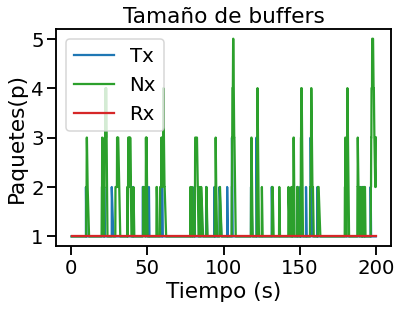

./simulaciones/v1-genint5.csv


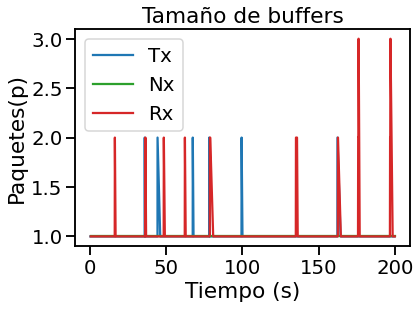

./simulaciones/v2-genint10.csv


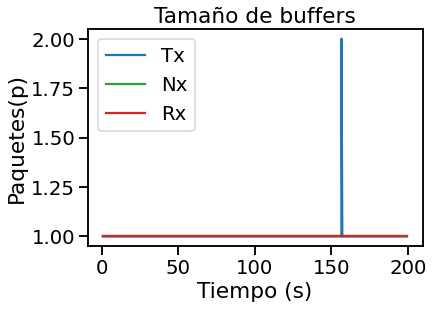

./simulaciones/v1-genint1.csv


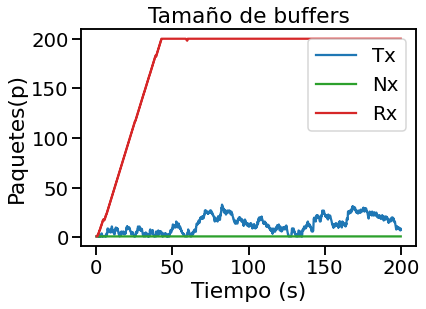

./simulaciones/v2-genint1.csv


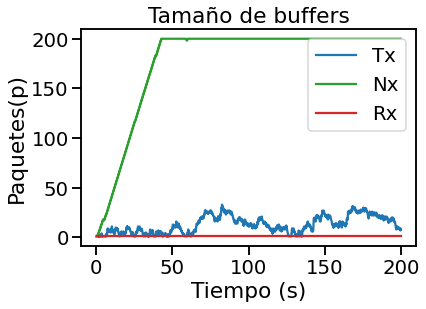

./simulaciones/v1-genint10.csv


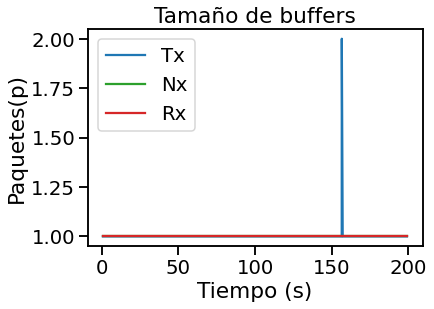

./simulaciones/v2-genint2.csv


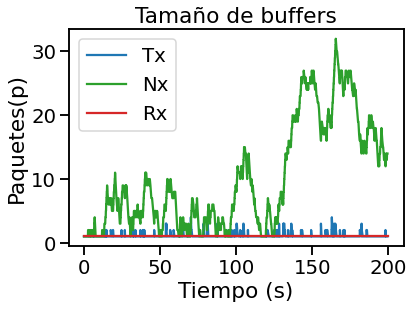

./simulaciones/v1-genint2.csv


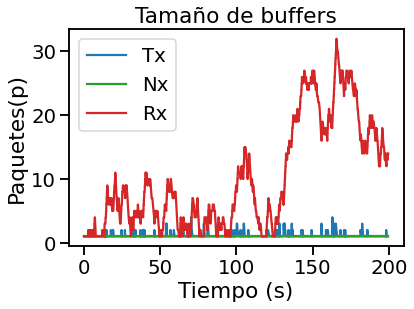

./simulaciones/v1-genint3.csv


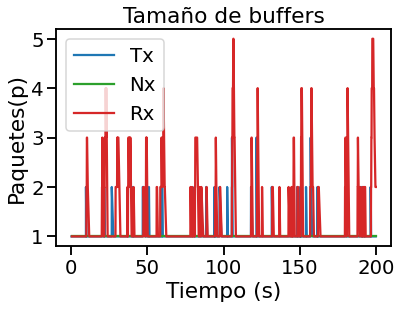

./simulaciones/v2-genint7.csv


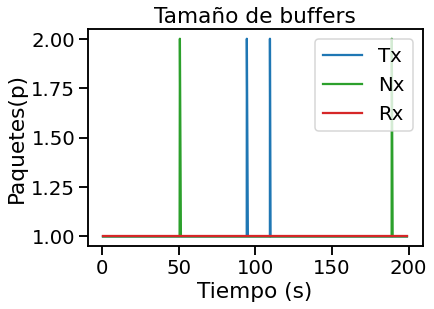

./simulaciones/v2-genint5.csv


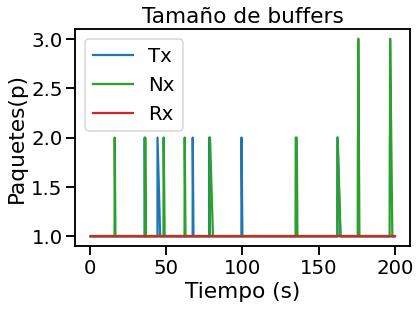

./simulaciones/v1-genint7.csv


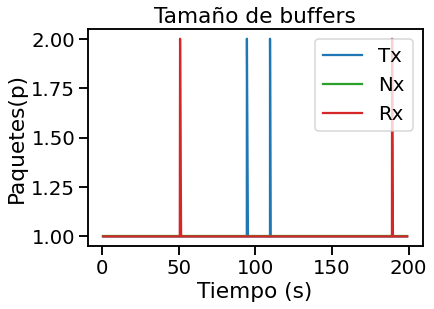

In [1]:
import matplotlib.pyplot as plt
from pandas import read_csv
from seaborn import set_context
from google.colab import files
from os import listdir,system
from time import sleep

set_context(context='talk', font_scale=1.2)

DIR   = './simulaciones/'
FILES = listdir(DIR)

for file in FILES:
    filename = DIR + file
    print(filename)
    data = read_csv(filename)
    #data
    ntx_col = q_col = nrx_col = 0
    """
    Dependiendo de la simulacion cambia la posicion del valor,
    debe ser por algo que tienen distinto agus y lola
    """
    if file.startswith('v1') or file == 'v2-genint10.csv' or file == 'v2-genint2.csv':
        ntx_col = 20
        q_col   = 21
        nrx_col = 22
    elif file.startswith('v2'):
        ntx_col = 25
        q_col   = 26
        nrx_col = 27
    else:
        print("Invalid File")
        break

    # Obtengo los valores de bufferSize
    #NodeTx
    ntx_vectime = (data['vectime'][ntx_col]).split(' ')
    ntx_vecvalue = (data['vecvalue'][ntx_col]).split(' ')
    #Queue
    q_vectime = (data['vectime'][q_col]).split(' ')
    q_vecvalue = (data['vecvalue'][q_col]).split(' ')
    #NodeRx
    nrx_vectime = (data['vectime'][nrx_col]).split(' ')
    nrx_vecvalue = (data['vecvalue'][nrx_col]).split(' ')

    #Convierto los valores de str a float para que sean "ploteables"
    ntx_vectime   = list(map(float,ntx_vectime))
    ntx_vecvalue  = list(map(float,ntx_vecvalue))
    nrx_vectime   = list(map(float,nrx_vectime))
    nrx_vecvalue  = list(map(float,nrx_vecvalue))
    q_vectime     = list(map(float,q_vectime))
    q_vecvalue    = list(map(float,q_vecvalue))

    plt.plot(ntx_vectime,ntx_vecvalue,color='tab:blue',label='Tx')
    plt.plot(q_vectime,q_vecvalue,color='tab:green',label='Nx')
    plt.plot(nrx_vectime,nrx_vecvalue,color='tab:red',label='Rx')

    plt.xlabel('Tiempo (s)')
    plt.ylabel('Paquetes(p)')
    plt.title('Tamaño de buffers')
    plt.legend()

    plt.savefig('plots/buffers/' + file.replace('.csv','') + '.png',
                bbox_inches ="tight",
                transparent = False,
                facecolor ="w",
                edgecolor ='w',
                orientation ='landscape')

    plt.show()
